In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
color=['red','blue','green','orange','purple','cyan','magenta','yellow','brown','pink','gray','olive','teal','navy','maroon','lime','coral',
       'gold','indigo','violet','lightblue','lightgreen','lightcoral','lightyellow','lightgray','lightpink','lightcyan','lightmagenta',
       'lightolive','lightteal','lightnavy','lightmaroon','lightlime','lightcoral','lightgold','lightindigo','lightviolet',
       'darkred','darkblue','darkgreen','darkorange','darkpurple','darkcyan','darkmagenta','darkyellow','darkbrown','darkpink',
       'darkgray','darkolive','darkteal','darknavy','darkmaroon','darklime','darkcoral','darkgold','darkindigo','darkviolet',
       'red','blue','green','orange','purple','cyan','magenta','yellow','brown','pink','gray','olive','teal','navy','maroon','lime','coral',
       'gold','indigo','violet','lightblue','lightgreen','lightcoral','lightyellow','lightgray','lightpink','lightcyan','lightmagenta',
       'lightolive','lightteal','lightnavy','lightmaroon','lightlime','lightcoral','lightgold','lightindigo','lightviolet',
       'darkred','darkblue','darkgreen','darkorange','darkpurple','darkcyan','darkmagenta','darkyellow','darkbrown','darkpink','darkgray','darkolive','darkteal','darknavy']

In [61]:
df= pd.read_csv('alzheimers_disease_data.csv')

In [62]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [63]:
df.drop(['PatientID','DoctorInCharge'],axis=1,inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [65]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
df.duplicated().sum()

0

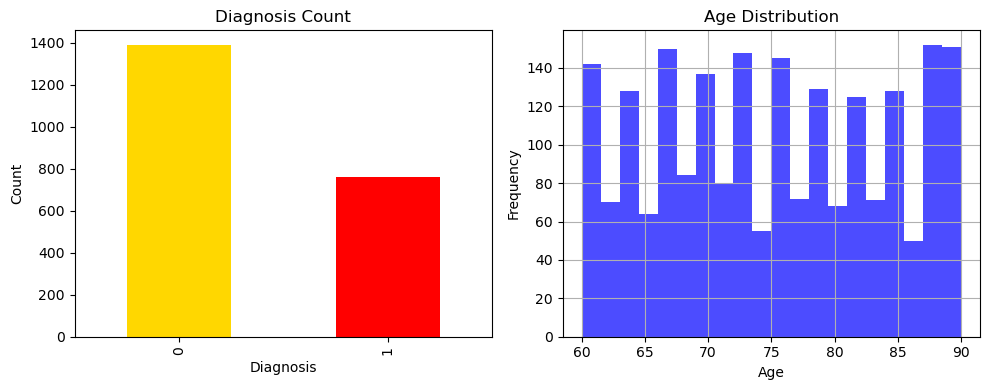

In [67]:
# Simple Visualizations
plt.figure(figsize=(10, 4))

# 1. Diagnosis Count
plt.subplot(1, 2, 1)
df['Diagnosis'].value_counts().plot(kind='bar', color=['gold', 'red'])
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# 2. Age Distribution
plt.subplot(1, 2, 2)
df['Age'].hist(bins=20, color='b', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

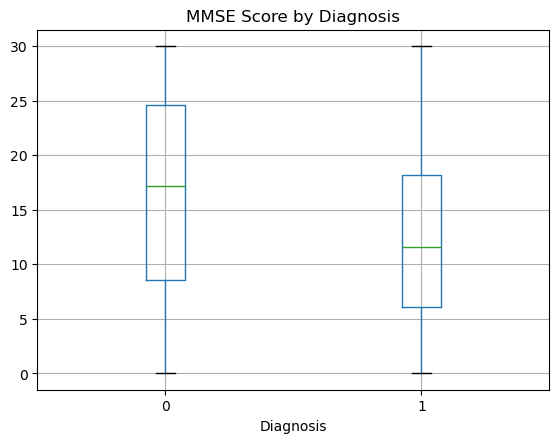

In [68]:
# Box plot MMSE vs Diagnosis
plt.figure(figsize=(8, 4))
df.boxplot(column='MMSE', by='Diagnosis')
plt.title('MMSE Score by Diagnosis')
plt.suptitle('')
plt.show()

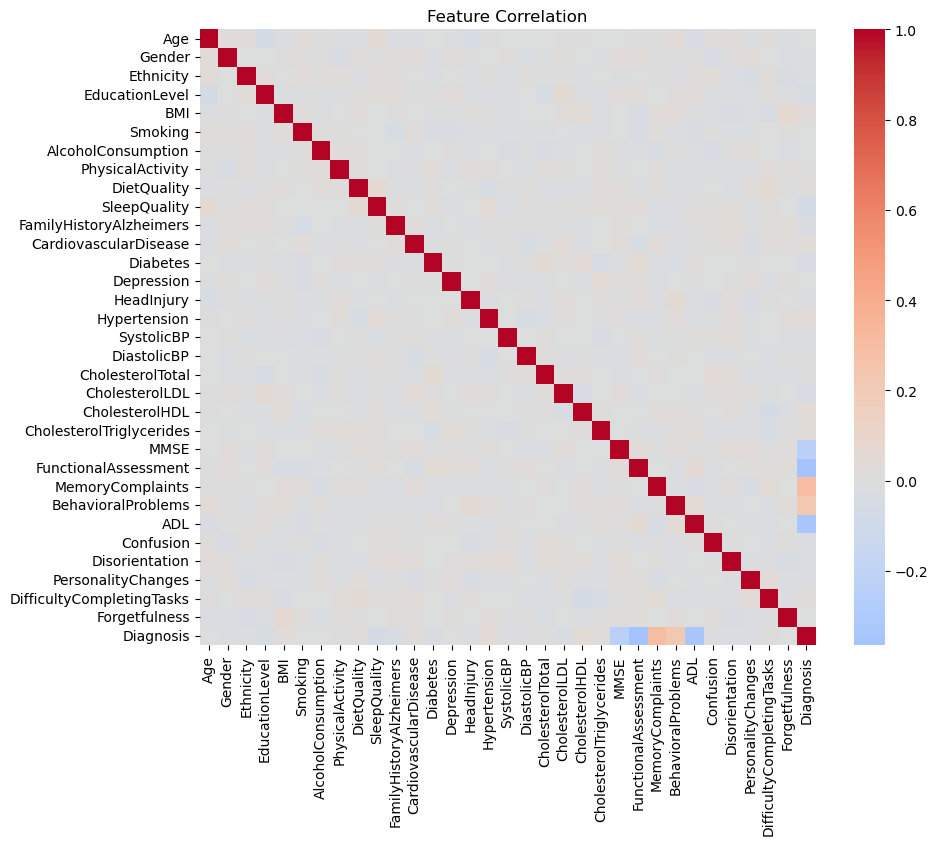

In [69]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation')
plt.show()

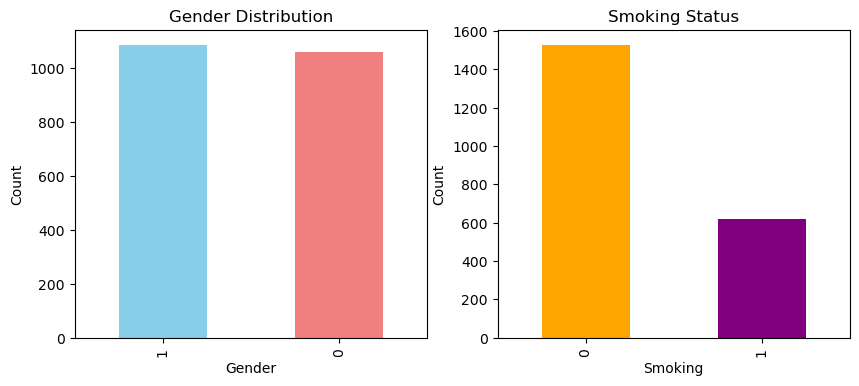

In [70]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['Smoking'].value_counts().plot(kind='bar', color=['orange', 'purple'])
plt.title('Smoking Status')
plt.xlabel('Smoking')
plt.ylabel('Count')


plt.show()

<Axes: xlabel='Diagnosis', ylabel='BMI'>

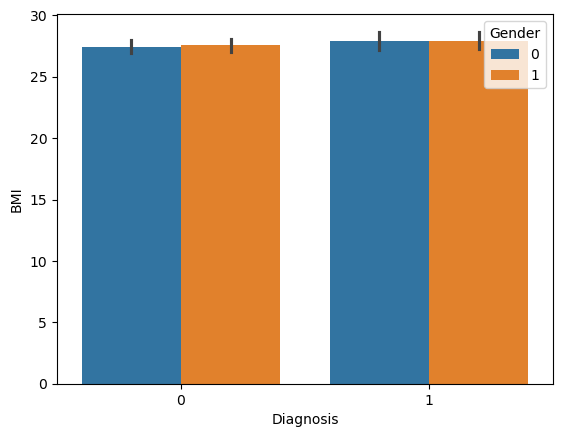

In [71]:
sns.barplot(x='Diagnosis',y='BMI',hue='Gender',data=df)

<Axes: xlabel='Smoking', ylabel='Count'>

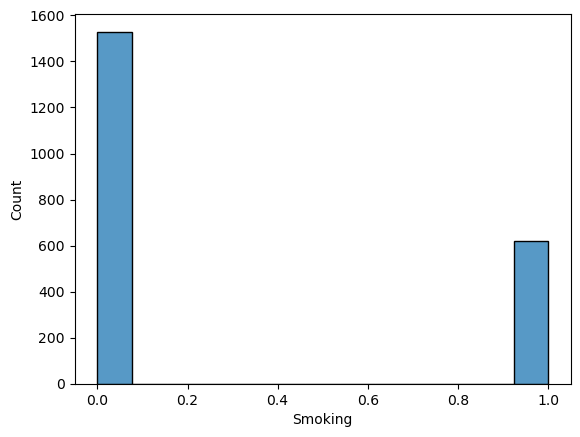

In [72]:
sns.histplot(x='Smoking',data=df)

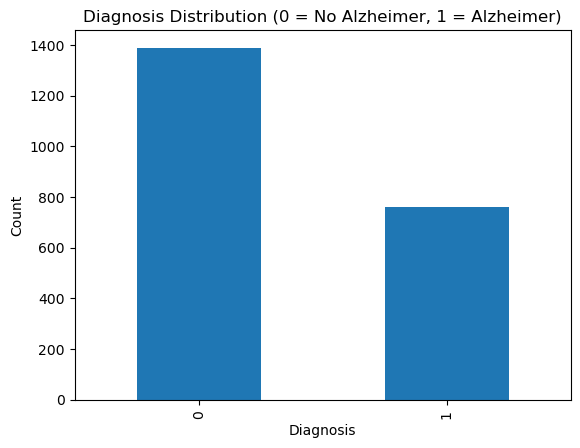

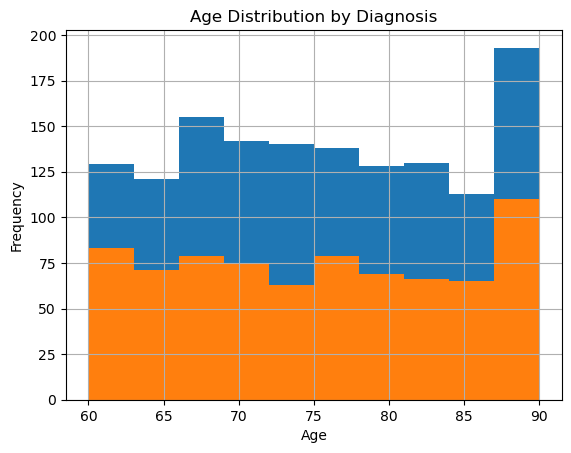

<Figure size 640x480 with 0 Axes>

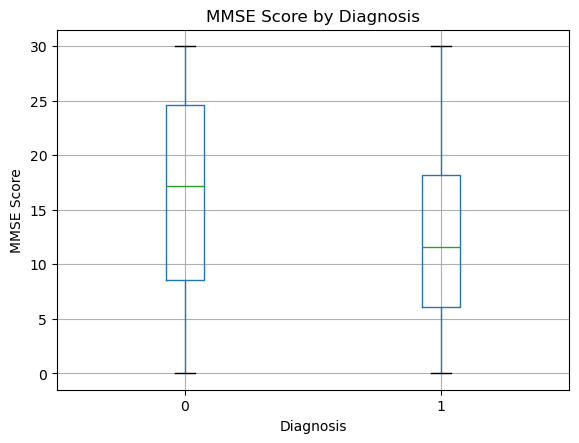

In [73]:
plt.figure()
df["Diagnosis"].value_counts().plot(kind="bar")
plt.title("Diagnosis Distribution (0 = No Alzheimer, 1 = Alzheimer)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

plt.figure()
df[df["Diagnosis"] == 0]["Age"].hist()
df[df["Diagnosis"] == 1]["Age"].hist()
plt.title("Age Distribution by Diagnosis")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure()
df.boxplot(column="MMSE", by="Diagnosis")
plt.title("MMSE Score by Diagnosis")
plt.suptitle("")
plt.xlabel("Diagnosis")
plt.ylabel("MMSE Score")
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X=df.drop('Diagnosis',axis=1)
y=df['Diagnosis']

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scal=StandardScaler()

In [79]:
X_train=scal.fit_transform(X_train)
X_test=scal.transform(X_test)

In [80]:
from models import run_classification_models,classifications_models

In [81]:
result=run_classification_models(classifications_models,X_train,X_test,y_train,y_test)

result

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Learning rate set to 0.012984
0:	learn: 0.6761958	total: 4.26ms	remaining: 4.26s
1:	learn: 0.6586747	total: 8.49ms	remaining: 4.24s
2:	learn: 0.6433618	total: 12.2ms	remaining: 4.05s
3:	learn: 0.6320899	total: 15.6ms	remaining: 3.88s
4:	learn: 0.6155114	total: 19.2ms	remaining: 3.82s
5:	learn: 0.6010278	total: 22.9ms	remaining: 3.79s
6:	learn: 0.5901148	total: 26.2ms	remaining: 3.71s
7:	learn: 0.5782986	total: 29.3ms	remaining: 3.63s
8:	learn: 0.5645786	total: 32.8ms	remaining: 3.61s
9:	learn: 0.5512788	total: 36.6ms	remaining: 3.63s
10:	learn: 0.5391532	total: 40.2ms	remaining: 3.62s
11:	learn: 0.5277917	total: 43.9ms	remaining: 3.62s
12:	learn: 0.5158132	total: 47.5ms	remaining: 3.61s
13:	learn: 0.5045465	total: 50.9ms	remaining: 3.59s
14:	learn: 0.4932357	total: 54.6ms	remaining: 3.58s
15:	learn: 0.4830299	total: 58.5ms	remaining: 3.6s
16:	learn: 0.4730572	total: 62.3ms	remaining: 3.6s
17:	learn: 0.4641654	total: 65.7ms	remaining: 3.58s
18:	learn: 0.4549787	total: 69.2ms	remaining: 

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
13,LGBMClassifier,1.000000,0.958140,1.000000,0.958347,1.000000,0.958140,1.000000,0.957876
10,HistGradient Boosting,1.000000,0.955814,1.000000,0.956112,1.000000,0.955814,1.000000,0.955498
12,CatBoostClassifier,0.988947,0.953488,0.988944,0.953632,0.988947,0.953488,0.988937,0.953195
6,GradientBoosting,0.986620,0.951163,0.986613,0.951070,0.986620,0.951163,0.986607,0.950976
11,XGBClassifier,1.000000,0.951163,1.000000,0.951388,1.000000,0.951163,1.000000,0.950813
3,RandomForest,1.000000,0.927907,1.000000,0.930318,1.000000,0.927907,1.000000,0.926567
2,DecisionTree,1.000000,0.906977,1.000000,0.906491,1.000000,0.906977,1.000000,0.906390
7,AdaBoost,0.922629,0.890698,0.922653,0.892001,0.922629,0.890698,0.921872,0.888435
9,BernoulliNB,0.860966,0.846512,0.859904,0.845030,0.860966,0.846512,0.858798,0.844130
5,ExtraTrees,1.000000,0.844186,1.000000,0.845692,1.000000,0.844186,1.000000,0.839148


In [82]:
from sklearn.decomposition import PCA

In [83]:
pca=PCA(n_components=30)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [84]:
result=run_classification_models(classifications_models,X_train_pca,X_test_pca,y_train,y_test)

result

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Learning rate set to 0.012984
0:	learn: 0.6887378	total: 5.8ms	remaining: 5.79s
1:	learn: 0.6838781	total: 10ms	remaining: 5s
2:	learn: 0.6802150	total: 14.1ms	remaining: 4.7s
3:	learn: 0.6758493	total: 18.7ms	remaining: 4.64s
4:	learn: 0.6715308	total: 23.1ms	remaining: 4.59s
5:	learn: 0.6683283	total: 27.5ms	remaining: 4.56s
6:	learn: 0.6649692	total: 32.4ms	remaining: 4.6s
7:	learn: 0.6619778	total: 36.6ms	remaining: 4.54s
8:	learn: 0.6590343	total: 41.9ms	remaining: 4.61s
9:	learn: 0.6549609	total: 46.3ms	remaining: 4.58s
10:	learn: 0.6517273	total: 50.7ms	remaining: 4.56s
11:	learn: 0.6485536	total: 55.2ms	remaining: 4.55s
12:	learn: 0.6445743	total: 59.3ms	remaining: 4.5s
13:	learn: 0.6409709	total: 63.6ms	remaining: 4.48s
14:	learn: 0.6380555	total: 68.2ms	remaining: 4.48s
15:	learn: 0.6344282	total: 72.8ms	remaining: 4.47s
16:	learn: 0.6314262	total: 77.3ms	remaining: 4.47s
17:	learn: 0.6282077	total: 82.3ms	remaining: 4.49s
18:	learn: 0.6255051	total: 92.2ms	remaining: 4.76s
1

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
8,GaussianNB,0.831297,0.818605,0.830853,0.817705,0.831297,0.818605,0.826260,0.812965
0,LogisticRegression,0.823735,0.809302,0.834628,0.818486,0.823735,0.809302,0.826311,0.811755
13,LGBMClassifier,1.000000,0.813953,1.000000,0.811938,1.000000,0.813953,1.000000,0.809060
6,GradientBoosting,0.978476,0.806977,0.978722,0.804634,0.978476,0.806977,0.978369,0.801673
12,CatBoostClassifier,0.990692,0.806977,0.990756,0.804955,0.990692,0.806977,0.990671,0.801212
10,HistGradient Boosting,1.000000,0.804651,1.000000,0.801684,1.000000,0.804651,1.000000,0.800394
11,XGBClassifier,1.000000,0.783721,1.000000,0.779880,1.000000,0.783721,1.000000,0.780148
3,RandomForest,1.000000,0.779070,1.000000,0.784239,1.000000,0.779070,1.000000,0.763315
9,BernoulliNB,0.753345,0.744186,0.747658,0.738026,0.753345,0.744186,0.741660,0.731363
5,ExtraTrees,1.000000,0.748837,1.000000,0.758175,1.000000,0.748837,1.000000,0.722490


In [85]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

In [86]:
feature_names = X.columns  
from sklearn.ensemble import RandomForestClassifier

fs_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, class_weight='balanced', n_jobs=-1, verbose=0, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', bootstrap=True, oob_score=True)
fs_model.fit(X_train, y_train)

importances = pd.Series(
    fs_model.feature_importances_,
    index=feature_names
).sort_values(ascending=False)
top_features = importances.head(10).index


In [87]:
top_features

Index(['FunctionalAssessment', 'ADL', 'MMSE', 'MemoryComplaints',
       'BehavioralProblems', 'PhysicalActivity', 'DietQuality',
       'CholesterolTriglycerides', 'CholesterolTotal', 'SleepQuality'],
      dtype='object')

In [88]:
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [89]:
X_train_selected=X_train[top_features]
X_test_selected=X_test[top_features]

In [90]:
result=run_classification_models(classifications_models,X_train_selected,X_test_selected,y_train,y_test)

result

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Learning rate set to 0.012984
0:	learn: 0.6760466	total: 3.87ms	remaining: 3.86s
1:	learn: 0.6593185	total: 6.79ms	remaining: 3.38s
2:	learn: 0.6434373	total: 9.13ms	remaining: 3.04s
3:	learn: 0.6283546	total: 11.6ms	remaining: 2.9s
4:	learn: 0.6122504	total: 14.2ms	remaining: 2.82s
5:	learn: 0.5967979	total: 17.1ms	remaining: 2.84s
6:	learn: 0.5833665	total: 20ms	remaining: 2.83s
7:	learn: 0.5700627	total: 22.7ms	remaining: 2.81s
8:	learn: 0.5575726	total: 25.5ms	remaining: 2.81s
9:	learn: 0.5445700	total: 28.4ms	remaining: 2.81s
10:	learn: 0.5353463	total: 31.1ms	remaining: 2.8s
11:	learn: 0.5238311	total: 33.7ms	remaining: 2.77s
12:	learn: 0.5128362	total: 36.4ms	remaining: 2.77s
13:	learn: 0.5011429	total: 42.4ms	remaining: 2.98s
14:	learn: 0.4904826	total: 46.5ms	remaining: 3.05s
15:	learn: 0.4804908	total: 49.4ms	remaining: 3.04s
16:	learn: 0.4707164	total: 52.5ms	remaining: 3.04s
17:	learn: 0.4606692	total: 57.1ms	remaining: 3.12s
18:	learn: 0.4516832	total: 60.4ms	remaining: 3.

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
13,LGBMClassifier,1.000000,0.953488,1.000000,0.953891,1.000000,0.953488,1.000000,0.953115
6,GradientBoosting,0.980803,0.951163,0.980788,0.951185,0.980803,0.951163,0.980792,0.950896
12,CatBoostClassifier,0.979639,0.951163,0.979621,0.951388,0.979639,0.951163,0.979612,0.950813
10,HistGradient Boosting,1.000000,0.951163,1.000000,0.951683,1.000000,0.951163,1.000000,0.950728
11,XGBClassifier,1.000000,0.948837,1.000000,0.949158,1.000000,0.948837,1.000000,0.948427
3,RandomForest,1.000000,0.948837,1.000000,0.949489,1.000000,0.948837,1.000000,0.948335
5,ExtraTrees,1.000000,0.911628,1.000000,0.914348,1.000000,0.911628,1.000000,0.909702
2,DecisionTree,1.000000,0.900000,1.000000,0.900155,1.000000,0.900000,1.000000,0.900072
7,AdaBoost,0.922629,0.890698,0.922653,0.892001,0.922629,0.890698,0.921872,0.888435
0,LogisticRegression,0.828389,0.839535,0.837738,0.844661,0.828389,0.839535,0.830711,0.841051


In [91]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [92]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:18: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [93]:
result.sort_values(by='test_accuracy',ascending=False)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
13,LGBMClassifier,1.000000,0.953488,1.000000,0.953891,1.000000,0.953488,1.000000,0.953115
6,GradientBoosting,0.980803,0.951163,0.980788,0.951185,0.980803,0.951163,0.980792,0.950896
12,CatBoostClassifier,0.979639,0.951163,0.979621,0.951388,0.979639,0.951163,0.979612,0.950813
10,HistGradient Boosting,1.000000,0.951163,1.000000,0.951683,1.000000,0.951163,1.000000,0.950728
11,XGBClassifier,1.000000,0.948837,1.000000,0.949158,1.000000,0.948837,1.000000,0.948427
3,RandomForest,1.000000,0.948837,1.000000,0.949489,1.000000,0.948837,1.000000,0.948335
5,ExtraTrees,1.000000,0.911628,1.000000,0.914348,1.000000,0.911628,1.000000,0.909702
2,DecisionTree,1.000000,0.900000,1.000000,0.900155,1.000000,0.900000,1.000000,0.900072
7,AdaBoost,0.922629,0.890698,0.922653,0.892001,0.922629,0.890698,0.921872,0.888435
9,BernoulliNB,0.864456,0.841860,0.863774,0.840210,0.864456,0.841860,0.862064,0.839407


In [94]:
best_model=GradientBoostingClassifier()
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



In [96]:


pipeline=Pipeline([
    ("feature_selection", SelectFromModel(
RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, class_weight='balanced', n_jobs=-1, verbose=0, min_samples_split=10, min_samples_leaf=5)    )),
    ("scaling", StandardScaler()),
    ("model", GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1))
])

In [97]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=cv,
    scoring="accuracy"
)

print("CV Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


CV Accuracy Scores: [0.94651163 0.94651163 0.93953488 0.94883721 0.94638695]
Mean Accuracy: 0.9455564590448311


In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'feature_selection__estimator__n_estimators': [50, 100],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.05, 0.1, 0.15]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'feature_selection__estimator__n_estimators': 50, 'model__learning_rate': 0.05, 'model__max_depth': 3}
Best Score: 0.9511378543936683


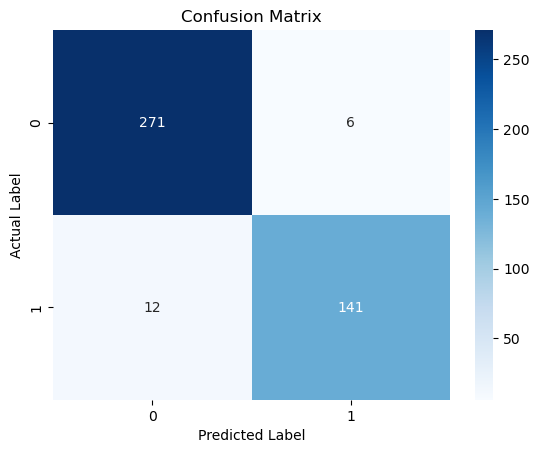

In [101]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

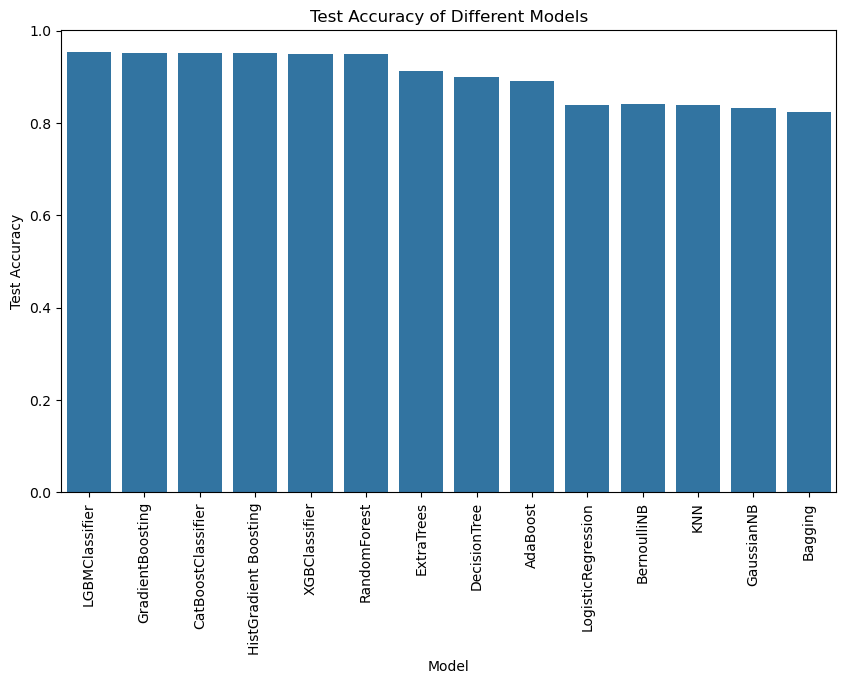

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(x=result['model'], y=result['test_accuracy'])
plt.xticks(rotation=90)
plt.title("Test Accuracy of Different Models")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.show()


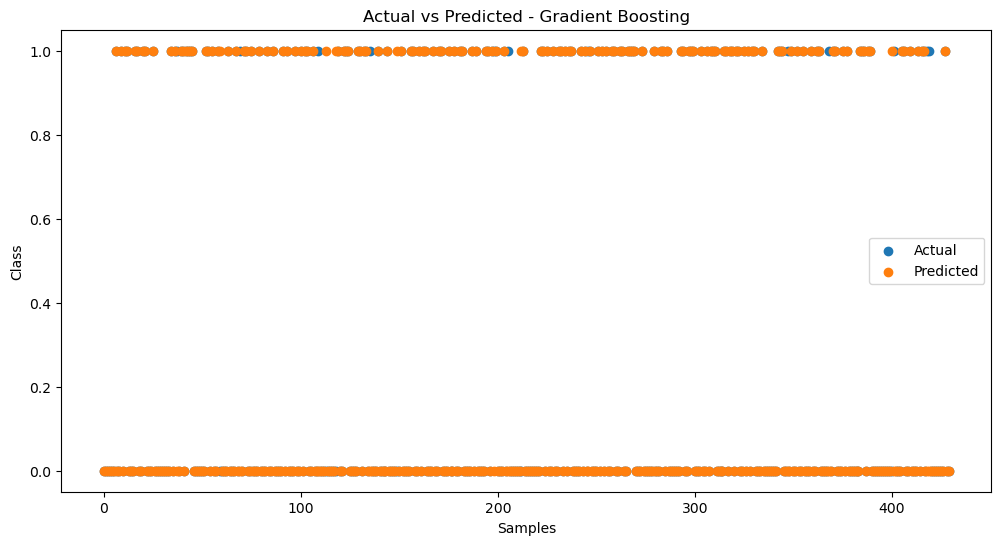

In [103]:
plt.figure(figsize=(12,6))

plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted")

plt.xlabel("Samples")
plt.ylabel("Class")
plt.title("Actual vs Predicted - Gradient Boosting")
plt.legend()
plt.show()


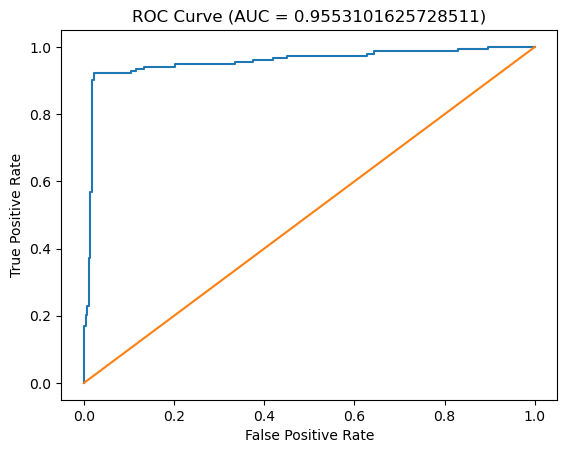

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc_score})")
plt.show()

In [105]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9591836734693877
Recall: 0.9215686274509803
F1 Score: 0.94


In [106]:
from joblib import dump

In [107]:
dump(best_model,'best_model.joblib')

['best_model.joblib']

In [108]:
# بناء Pipeline كامل يجمع كل خطوات المعالجة والنمذجة
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# إنشاء Pipeline شامل
final_pipeline = Pipeline([
    ("scaling", StandardScaler()),
    ("model", GradientBoostingClassifier(random_state=42))
])

# تدريب Pipeline على البيانات الأصلية الكاملة
final_pipeline.fit(X_train, y_train)

# عمل تنبؤات على بيانات التدريب والاختبار
y_pred_train_final = final_pipeline.predict(X_train)
y_pred_test_final = final_pipeline.predict(X_test)

# حساب الدقة
train_acc = accuracy_score(y_train, y_pred_train_final)
test_acc = accuracy_score(y_test, y_pred_test_final)

print(f"Pipeline Training Accuracy: {train_acc:.4f}")
print(f"Pipeline Testing Accuracy: {test_acc:.4f}")
print("\n" + "="*50 + "\n")
print("Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test_final))

# حفظ Pipeline النهائي
from joblib import dump
dump(final_pipeline, 'pipeline_final.joblib')
print("\nFinal Pipeline saved as 'pipeline_final.joblib'")

Pipeline Training Accuracy: 0.9668
Pipeline Testing Accuracy: 0.9581


Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430


Final Pipeline saved as 'pipeline_final.joblib'


In [109]:
# Using only top_features for prediction
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train best model with top features only
best_model_top = GradientBoostingClassifier(random_state=42)
best_model_top.fit(X_train_top, y_train)

# Predictions
y_pred_top = best_model_top.predict(X_test_top)

# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_acc_top = accuracy_score(y_train, best_model_top.predict(X_train_top))
test_acc_top = accuracy_score(y_test, y_pred_top)
precision_top = precision_score(y_test, y_pred_top)
recall_top = recall_score(y_test, y_pred_top)
f1_top = f1_score(y_test, y_pred_top)

print("="*60)
print("MODEL PERFORMANCE WITH TOP FEATURES ONLY")
print("="*60)
print(f"Training Accuracy: {train_acc_top:.4f}")
print(f"Testing Accuracy:  {test_acc_top:.4f}")
print(f"Precision:         {precision_top:.4f}")
print(f"Recall:            {recall_top:.4f}")
print(f"F1-Score:          {f1_top:.4f}")
print("="*60)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_top))

# Save the model
dump(best_model_top, 'best_model_top_features.joblib')
print("\nModel saved as 'best_model_top_features.joblib'")

MODEL PERFORMANCE WITH TOP FEATURES ONLY
Training Accuracy: 0.9668
Testing Accuracy:  0.9558
Precision:         0.9527
Recall:            0.9216
F1-Score:          0.9369

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       277
           1       0.95      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430


Model saved as 'best_model_top_features.joblib'
